In [1]:
from dredFISH.Analysis.TissueGraph import *
from dredFISH.Analysis.Taxonomy import *

from MERFISH_Objects.FISHData import *

from sklearn.preprocessing import normalize

import matplotlib.pyplot as plt 

%load_ext line_profiler

In [2]:
#Load Cell/Zone layers
TMG = TissueMultiGraph('TMG_dev.pkl')

In [2]:
base_path = '/bigstore/Images2021/gaby/dredFISH/DPNMF_PolyA_2021Nov19/'
dataset = 'DPNMF_PolyA_2021Nov19'
fishdata = FISHData(os.path.join(base_path,'fishdata'))
data = fishdata.load_data('h5ad',dataset=dataset)
data.obs_names_make_unique()

data.X = data.layers['total_vectors']
data = data[np.isnan(data.X.max(1))==False]

data.X = data.X/data.obs['total_signal'][:,None]
data.X = data.X - np.array([np.percentile(data.X[:,i],25) for i in range(data.X.shape[1])])
data.X = data.X / np.array([np.percentile(data.X[:,i],75) for i in range(data.X.shape[1])])
data.X = normalize(data.X)

XY = np.asarray([data.obs['stage_y'], data.obs['stage_x']])
XY = np.transpose(XY)
data.obsm['stage'] = XY

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
/tmp/ipykernel_1898215/676460092.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  data.X = data.X/data.obs['total_signal'][:,None]


In [ ]:
TMG = TissueMultiGraph()
TMG.ScalarEnvSize = 15
TMG.createCellAndZoneLayers(XY,data.X)

Build similarity graph 
calculation took: 297.90
Calling initial optimization
 
 Func-count     x          f(x)          Procedure
    1        11.5208       -7.471        initial
    2        18.5792     -7.31161        golden
    3        7.15843     -7.74128        golden
    4        4.46235      -7.4972        golden
    5        7.90566     -7.66048        parabolic
    6        6.59493     -7.70086        parabolic
    7        7.13802     -7.62956        parabolic
    8        7.16177     -7.73758        parabolic
    9        7.15064     -7.69894        golden


In [3]:
TMG.addEnvironmentLayer()
TMG.save('TMG_E1_dev.pkl')

Perform initial over-segmentation with Treenomial mixture
Treenomial mixture model training:
epoch: 0 likelihood: -18790932.49 delta: inf time: 218.57


/home/rwollman/MyProjects/MaximallyInformativeBiocartography/dredFISH/dredFISH/Analysis/Taxonomy.py:488: RuntimeWarning: invalid value encountered in true_divide
  q = q_no/q_deno


epoch: 1 likelihood: -7901668.64 delta: 0.579 time: 316.58
epoch: 2 likelihood: -7135973.79 delta: 0.097 time: 413.13
epoch: 3 likelihood: -6883349.88 delta: 0.035 time: 509.92
epoch: 4 likelihood: -6752417.76 delta: 0.019 time: 607.55
epoch: 5 likelihood: -6695901.61 delta: 0.008 time: 705.61
epoch: 6 likelihood: -6575975.62 delta: 0.018 time: 807.24
epoch: 7 likelihood: -6504888.80 delta: 0.011 time: 910.09
epoch: 8 likelihood: -6471371.78 delta: 0.005 time: 1010.95
epoch: 9 likelihood: -6432845.23 delta: 0.006 time: 1109.77
epoch: 10 likelihood: -6400322.94 delta: 0.005 time: 1209.76
epoch: 11 likelihood: -6378238.44 delta: 0.003 time: 1311.15
epoch: 12 likelihood: -6362771.97 delta: 0.002 time: 1408.25
epoch: 13 likelihood: -6352355.50 delta: 0.002 time: 1506.34
epoch: 14 likelihood: -6345060.80 delta: 0.001 time: 1603.19
epoch: 15 likelihood: -6330249.61 delta: 0.002 time: 1700.12
epoch: 16 likelihood: -6318120.93 delta: 0.002 time: 1797.93
epoch: 17 likelihood: -6315315.37 delta:

In [12]:
np.mean(TMG.Layers[-1].TX.TMM.freq==0)

0.778

In [4]:
TMG.addEnvironmentLayer()
TMG.save('TMG_E2_dev.pkl')

Perform initial over-segmentation with Treenomial mixture
Treenomial mixture model training:


/home/rwollman/MyProjects/MaximallyInformativeBiocartography/dredFISH/dredFISH/Analysis/Taxonomy.py:488: RuntimeWarning: invalid value encountered in true_divide
  q = q_no/q_deno


KeyboardInterrupt: 

In [7]:
TMG.save('TMG_12Layers_dev.pkl')

In [10]:
Ent = [l.CondEntropy() for l in TMG.Layers]
N = [l.N for l in TMG.Layers]
Ntypes = [l.Ntypes for l in TMG.Layers]

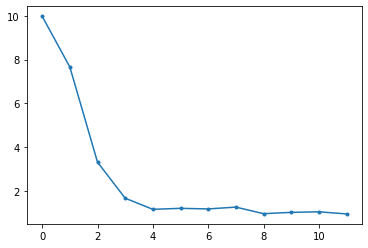

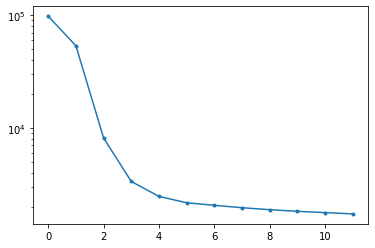

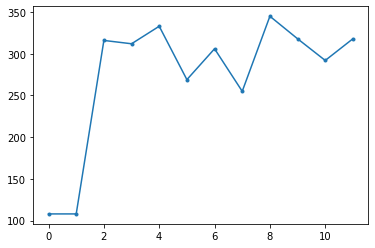

In [18]:
plt.plot(Ent,'.-')
plt.figure()
plt.semilogy(N,'.-')
plt.figure()
plt.plot(Ntypes,'.-')

In [3]:
TMG.save('TMG_dev.pkl')

Build similarity graph 
calculation took: 274.09
Calling initial optimization
 
 Func-count     x          f(x)          Procedure
    1        11.5208     -7.56147        initial
    2        18.5792     -7.27268        golden
    3        7.15843     -7.61834        golden
    4        6.66965     -7.66508        parabolic
    5        4.16027      -7.5902        golden
    6        5.77148      -7.5993        parabolic
    7        6.52133     -7.63828        parabolic
    8         6.8038     -7.74868        parabolic
    9        6.93926     -7.66654        golden
   10        6.80714     -7.69726        parabolic
   11        6.75256     -7.66236        golden
   12        6.78423     -7.69688        golden
   13        6.79569     -7.63968        parabolic
   14        6.80047     -7.70136        parabolic

Optimization terminated successfully;
The returned value satisfies the termination criteria
(using xtol =  0.01 )
Initial entropy was: 7.7486845863681015 number of evals: 14


In [4]:
TMG.save('TMG_WithEnv_dev.pkl')

In [8]:
[l.N for l in TMG.Layers]

[97786, 53002, 8625]

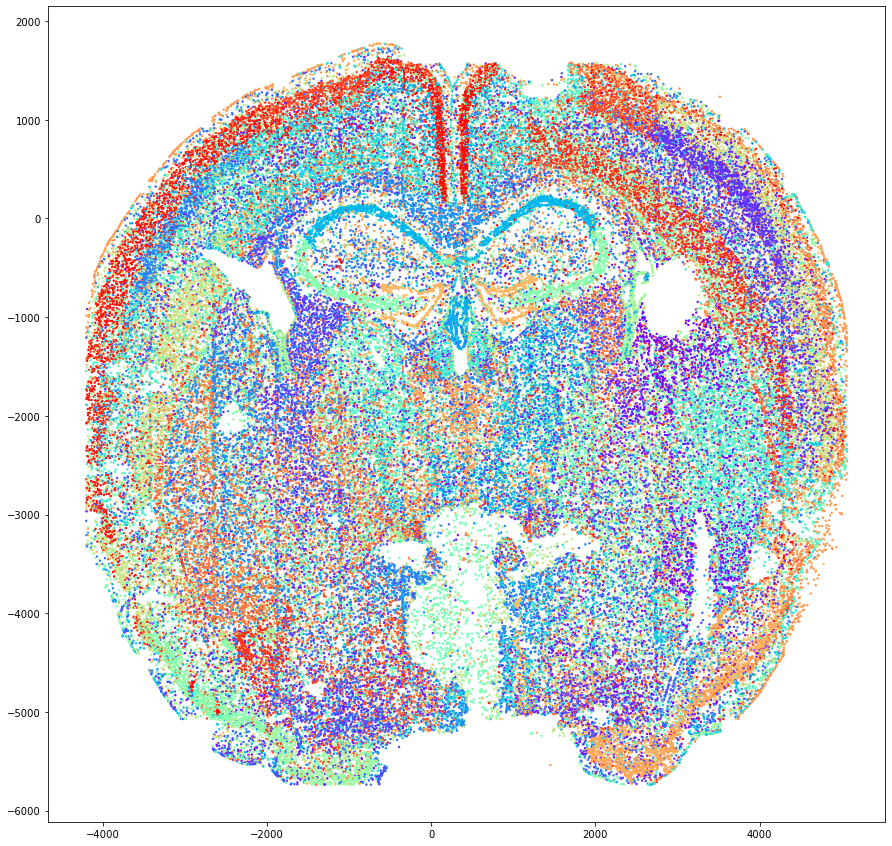

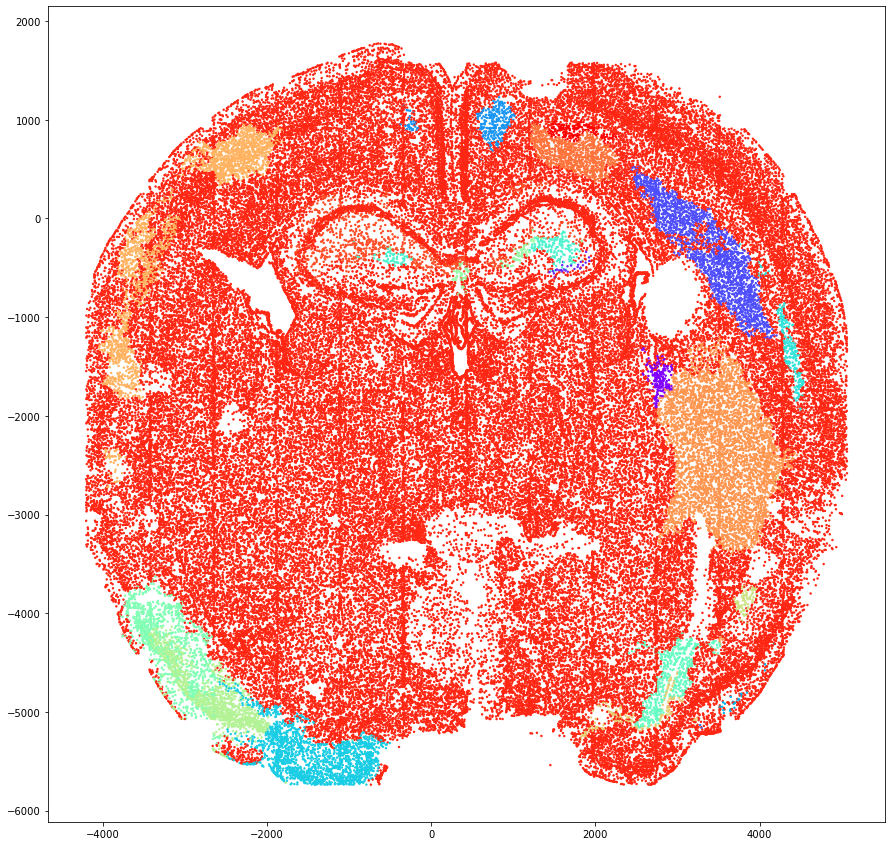

In [6]:
# plot
for i in range(1,len(TMG.Layers)): 
    TMG.scatter(i)

 Entropy: 5.01 Ntypes: 312


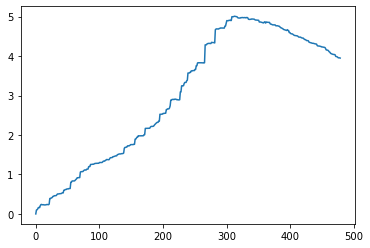

In [160]:
plt.plot(Ent)
print(f" Entropy: {np.max(Ent):.2f} Ntypes: {np.argmax(Ent)}")
EG.Type = NewType

In [23]:
import copy

In [24]:
TMG2 = copy.deepcopy(TMG)

In [25]:
TMG2.Layers